# Formulating and simulating a hypothesis

In [1]:
# How do we assess that the observed data is actually described by the model, is addressed via hypothesis testing

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Generating a permutation sample

In [4]:
def permutation_sample(data1, data2):
    
    data = np.concatenate((data1, data2))
    permutated_data = np.random.permutation(data)
    
    per_sample_1 = permutated_data[:len(data1)]
    per_sample_2 = permutated_data[len(data2):]
    
    return per_sample_1, per_sample_2

def ecdf(data):
    x = np.sort(data)
    y = np.arange(1, len(data)+1)/len(data)
    return x, y

In [5]:
# prepare data
rain_june = np.array([66.2,  39.7,  76.4,  26.5,  11.2,  61.8,   6.1,  48.4,  89.2,
       104. ,  34. ,  60.6,  57.1,  79.1,  90.9,  32.3,  63.8,  78.2,
        27.5,  43.4,  30.1,  17.3,  77.5,  44.9,  92.2,  39.6,  79.4,
        66.1,  53.5,  98.5,  20.8,  55.5,  39.6,  56. ,  65.1,  14.8,
        13.2,  88.1,   8.4,  32.1,  19.6,  40.4,   2.2,  77.5, 105.4,
        77.2,  38. ,  27.1, 111.8,  17.2,  26.7,  23.3,  77.2,  87.2,
        27.7,  50.6,  60.3,  15.1,   6. ,  29.4,  39.3,  56.3,  80.4,
        85.3,  68.4,  72.5,  13.3,  28.4,  14.7,  37.4,  49.5,  57.2,
        85.9,  82.1,  31.8, 126.6,  30.7,  41.4,  33.9,  13.5,  99.1,
        70.2,  91.8,  61.3,  13.7,  54.9,  62.5,  24.2,  69.4,  83.1,
        44. ,  48.5,  11.9,  16.6,  66.4,  90. ,  34.9, 132.8,  33.4,
       225. ,   7.6,  40.9,  76.5,  48. , 140. ,  55.9,  54.1,  46.4,
        68.6,  52.2, 108.3,  14.6,  11.3,  29.8, 130.9, 152.4,  61. ,
        46.6,  43.9,  30.9, 111.1,  68.5,  42.2,   9.8, 285.6,  56.7,
       168.2,  41.2,  47.8, 166.6,  37.8,  45.4,  43.2])
rain_nov = np.array([83.6,  30.9,  62.2,  37. ,  41. , 160.2,  18.2, 122.4,  71.3,
        44.2,  49.1,  37.6, 114.5,  28.8,  82.5,  71.9,  50.7,  67.7,
       112. ,  63.6,  42.8,  57.2,  99.1,  86.4,  84.4,  38.1,  17.7,
       102.2, 101.3,  58. ,  82. , 101.4,  81.4, 100.1,  54.6,  39.6,
        57.5,  29.2,  48.8,  37.3, 115.4,  55.6,  62. ,  95. ,  84.2,
       118.1, 153.2,  83.4, 104.7,  59. ,  46.4,  50. , 147.6,  76.8,
        59.9, 101.8, 136.6, 173. ,  92.5,  37. ,  59.8, 142.1,   9.9,
       158.2,  72.6,  28. , 112.9, 119.3, 199.2,  50.7,  44. , 170.7,
        67.2,  21.4,  61.3,  15.6, 106. , 116.2,  42.3,  38.5, 132.5,
        40.8, 147.5,  93.9,  71.4,  87.3, 163.7, 141.4,  62.6,  84.9,
        28.8, 121.1,  28.6,  32.4, 112. ,  50. ,  96.9,  81.8,  70.4,
       117.5,  41.2, 124.9,  78.2,  93. ,  53.5,  50.5,  42.6,  47.9,
        73.1, 129.1,  56.9, 103.3,  60.5, 134.3,  93.1,  49.5,  48.2,
       167.9,  27. , 111.1,  55.4,  36.2,  57.4,  66.8,  58.3,  60. ,
       161.6, 112.7,  37.4, 110.6,  56.6,  95.8, 126.8])

### visualizing permutation samples
Below plot, Notice that the permutation samples ECDFs overlap and give a purple haze. None of the ECDFs from the permutation samples overlap with the observed data, suggesting that the hypothesis is not commensurate with the data. June and November rainfall are not identically distributed.

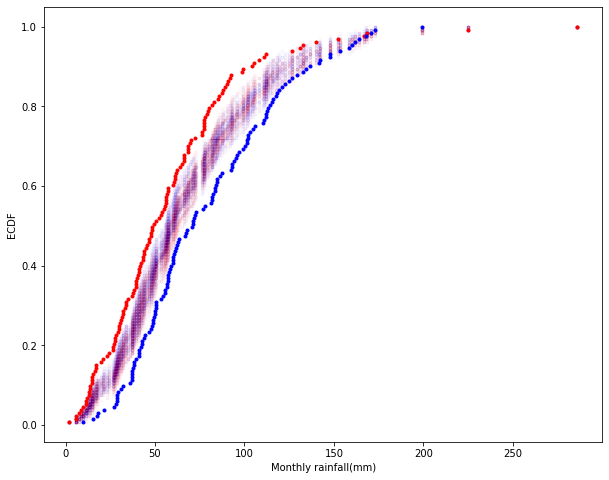

In [36]:
for i in range(50):
    perm_sample_1, perm_sample_2 = permutation_sample(rain_june, rain_nov)
    
    #     compute ecdf
    x_1, y_1 = ecdf(perm_sample_1)
    x_2, y_2 = ecdf(perm_sample_2)
    
    _ = plt.rcParams['figure.figsize'] = (10,8)
    _ = plt.plot(x_1, y_1, marker='.', linestyle='none', color='red',alpha=0.02)
    _ = plt.plot(x_2, y_2, marker='.', linestyle='none', color='blue', alpha=0.02)


# Create and plot ecdf form original data
x_1, y_1 = ecdf(rain_june)
x_2, y_2 = ecdf(rain_nov)

_ = plt.plot(x_1, y_1, marker='.', linestyle='none', color='red')
_ = plt.plot(x_2, y_2, marker='.', linestyle='none', color='blue')

_ = plt.xlabel("Monthly rainfall(mm)")
_ = plt.ylabel('ECDF')

plt.show()

### Test statistics and p value
- Hypothesis testing is assessment of how reasonable the data are assuming hypothesis is true.
- But, what about the data do we assess anf how do quantify the assessment. we use Test statistics (serves as comparison between two)
- <b> p-value:</b> probability of obtaining your test statistic that is atleast as extreme or equal to what was observed under the assumption the null hypothesis is true.
    p-value is NOT the probability that null hypothesis is true.

In [37]:
# prepare data for test statics


### Generating permutation 'replicates'
permutation replicate is a single value of a statistic computed from a permutation sample.

In [71]:
def draw_prem_reps(data_1, data_2, func, size=1):
    prem_replicates = np.empty(size)
    
    for i in range(size):
        prem_sample_1, prem_sample_2 = permutation_sample(data_1, data_2)
        prem_replicates[i] = func(prem_sample_1, prem_sample_2)
    
    return prem_replicates


In [72]:
ID = np.array(('A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A',
       'A', 'A', 'A', 'A', 'A', 'A', 'A', 'B', 'B', 'B', 'B', 'B', 'B',
       'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B',
       'B'))
impact_force = np.array((1.612, 0.605, 0.327, 0.946, 0.541, 1.539, 0.529, 0.628, 1.453,
       0.297, 0.703, 0.269, 0.751, 0.245, 1.182, 0.515, 0.435, 0.383,
       0.457, 0.73 , 0.172, 0.142, 0.037, 0.453, 0.355, 0.022, 0.502,
       0.273, 0.72 , 0.582, 0.198, 0.198, 0.597, 0.516, 0.815, 0.402,
       0.605, 0.711, 0.614, 0.468))
df = pd.DataFrame({'ID':ID, 'impact_force':impact_force})
df.head()

,ID,impact_force
0,A,1.612
1,A,0.605
2,A,0.327
3,A,0.946
4,A,0.541


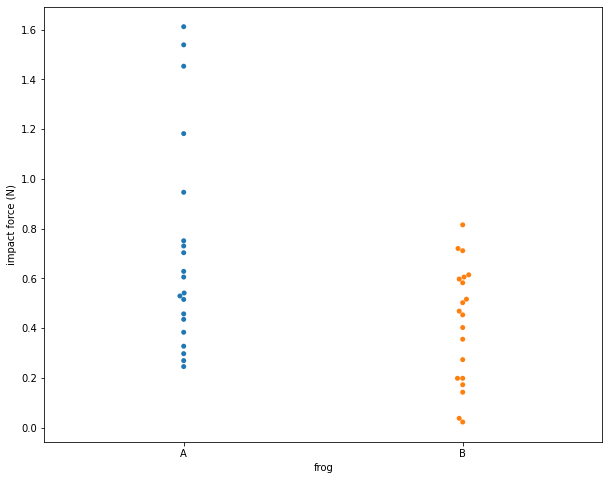

In [73]:
# EDA before hypothesis testing
# make beeswarm plot
_ = sns.swarmplot(x='ID', y='impact_force', data=df)
_ = plt.xlabel('frog')
_ = plt.ylabel('impact force (N)')

plt.show()

Eyeballing it, it does not look like they come from the same distribution. Frog A, the adult, has three or four very hard strikes, and Frog B, the juvenile, has a couple weak ones. However, it is possible that with only 20 samples it might be too difficult to tell if they have difference distributions, so we should proceed with the hypothesis test.

In [77]:
# permutation test on frog data

frog_a = df[df['ID'] == 'A']['impact_force']
frog_b = df[df['ID'] == 'B']['impact_force']

def diff_means(data_1, data_2):
    diff_means = np.mean(data_1) - np.mean(data_2)
    return diff_means

# compute diff of mean impact for from experiment
empirical_diff_means = diff_means(frog_a, frog_b)
print("empirical diff means:", empirical_diff_means)

# draw 10000 permutation samples
perm_replicates = draw_prem_reps(frog_a, frog_b, diff_means, 10000)


empirical diff means: 0.28825000000000006


In [78]:
# compute p-value
np.sum(perm_replicates >= empirical_diff_means)/len(perm_replicates)

0.0067

### Pipeline for hypothesis testing

In [ ]:
# clearly state NULL hypothesis
# defin you test statistic
# generate many set of sumulated data assuming null hypothesis to be true
# compute test statistic for each simulated data
# The p-value is the fraction of your simulted datasets for which test statistic is atleast as extreme as in observed data.


####### one smaple bootstrap hypothesis test

Another juvenile frog was studied, Frog C, and you want to see if Frog B and Frog C have similar impact forces. Unfortunately, you do not have Frog C's impact forces available, but you know they have a mean of 0.55 N. Because you don't have the original data, you cannot do a permutation test, and you cannot assess the hypothesis that the forces from Frog B and Frog C come from the same distribution. You will therefore test another, less restrictive hypothesis: The mean strike force of Frog B is equal to that of Frog C.

To set up the bootstrap hypothesis test, you will take the mean as our test statistic. Remember, your goal is to calculate the probability of getting a mean impact force less than or equal to what was observed for Frog B if the hypothesis that the true mean of Frog B's impact forces is equal to that of Frog C is true. You first translate all of the data of <br>Frog B such that the mean is 0.55 N</b>. This involves adding the mean force of Frog C and subtracting the mean force of Frog B from each measurement of Frog B. This leaves other properties of Frog B's distribution, such as the variance, unchanged.

In [96]:
def bs_sample(data, func):
    bs_sample = np.random.choice(data, len(data))
    return func(bs_sample)

def draw_bs_replicates(data, func, size=1):
    bs_replicates = np.empty(size)
    
    for i in range(size):
        bs_replicates[i] = bs_sample(data, func)
    return bs_replicates

# make an array of translated impact forces:
force_b = frog_b.copy()

translated_force_b = force_b - np.mean(force_b) + 0.55
# print(translated_force_b)
# Take bootstrap replicates of Frog B's translated impact force: bs_replicates
bs_replicates = draw_bs_replicates(translated_force_b, np.mean, 10000)

# Compute fraction of replicates that are less than the 
# observed Frog B force: p-value
p = np.sum(bs_replicates <= np.mean(force_b))/len(bs_replicates)

print("P-value:",p)

# The low p-value suggests that the null hypothesis that 
# Frog B and Frog C have the same mean impact force is false.

P-value: 0.0071


#### Two-sample bootstrap hypothesis test for differences of means

A two-sample bootstrap hypothesis test for difference of means
We now want to test the hypothesis that Frog A and Frog B have the same mean impact force, but not necessarily the same distribution, which is also impossible with a permutation test.

To do the two-sample bootstrap test, we shift both arrays to have the same mean, since we are simulating the hypothesis that their means are, in fact, equal. We then draw bootstrap samples out of the shifted arrays and compute the difference in means. This constitutes a bootstrap replicate, and we generate many of them. The p-value is the fraction of replicates with a difference in means greater than or equal to what was observed.

The objects forces_concat and empirical_diff_means are already in your namespace.

In [102]:
force_a = frog_a.copy()
force_b = frog_b.copy()
# Compute mean of all forces: mean_force
mean_force = np.mean(np.concatenate((frog_a, frog_b)))

# Generate shifted arrays
force_a_shifted = force_a - np.mean(force_a) + mean_force
force_b_shifted = force_b - np.mean(force_b) + mean_force

# Compute 10,000 bootstrap replicates from shifted arrays
bs_replicates_a = draw_bs_replicates(force_a_shifted, np.mean, 10000)
bs_replicates_b = draw_bs_replicates(force_b_shifted, np.mean, 10000)

# Get replicates of difference of means: bs_replicates
bs_replicates = bs_replicates_a - bs_replicates_b

# Compute and print p-value: p
p = np.sum(bs_replicates >= empirical_diff_means) / len(bs_replicates)
print('p-value =', p)


p-value = 0.0055


In [97]:
# You got a similar result as when you did the permutation 
# test. Nonetheless, remember that it is important to 
# carefully think about what question you want to ask. 
# Are you only interested in the mean impact force, or 
# in the distribution of impact forces